In [149]:
import torchvision.transforms as transforms
import torch.nn as nn
import torchvision
import math
import matplotlib.pyplot as plt
import torch
import urllib
import numpy as np
import PIL

In [150]:
def get_sample_image()-> PIL.Image.Image:
    url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTZmJy3aSZ1Ix573d2MlJXQowLCLQyIUsPdniOJ7rBsgG4XJb04g9ZFA9MhxYvckeKkVmo&usqp=CAU'
    filename = 'racoon.jpg'
    urllib.request.urlretrieve(url, filename)
    return PIL.Image.open(filename)

In [151]:
image = get_sample_image()

transform = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x * 2.0 - 1.0)
])


reverse_transform = transforms.Compose([
    transforms.Lambda(lambda x: (x + 1.0) / 2.0),
    transforms.Lambda(lambda x : x.permute(1,2,0)),
    transforms.Lambda(lambda x: x*255.0),
    transforms.Lambda(lambda x: x.numpy().astype(np.uint8)),
    transforms.ToPILImage(),
])
torch_image = transform(image)

In [152]:
def forward_diffusion(x0, t, betas = torch.linspace(0.0, 0.1, 5)):
    noise = torch.randn_like(x0)
    alphas = 1.0 - betas
    alpha_hat = torch.cumprod(alphas, dim=0)
    alpha_hat_t = alpha_hat.gather(-1, t).reshape(-1, 1, 1, 1)

    mean = alpha_hat_t.sqrt() * x0
    variance = torch.sqrt(1-alpha_hat_t) * noise

    return mean + variance, noise

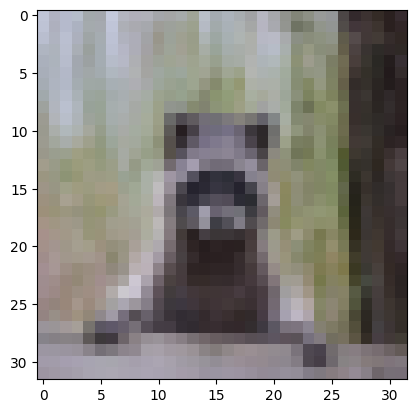

In [154]:
plt.imshow(reverse_transform(torch_image))

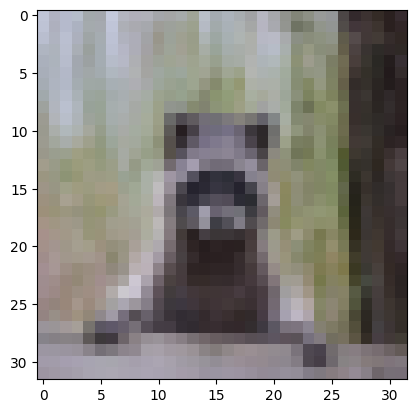

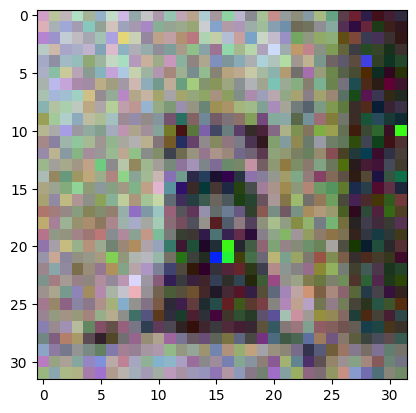

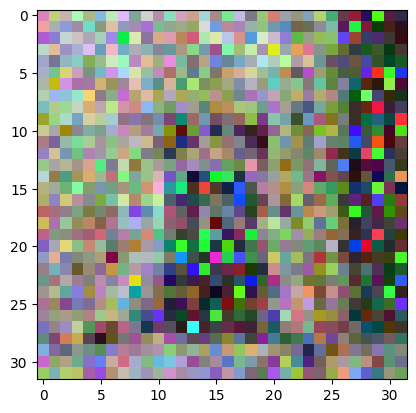

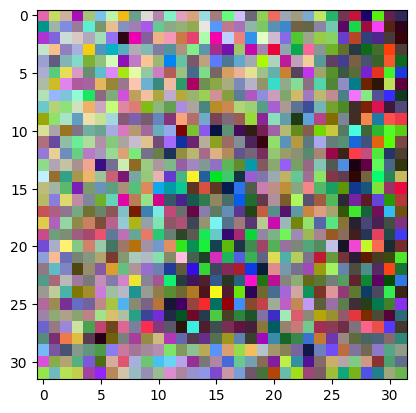

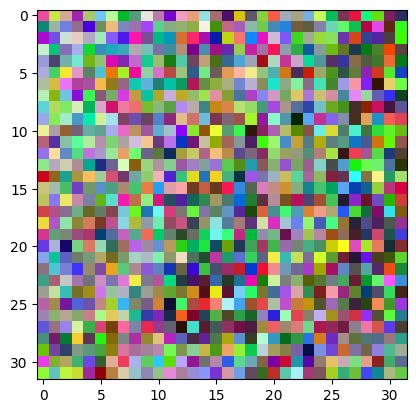

In [159]:
noisy_images , noice = forward_diffusion(torch_image, torch.tensor([0,1,2,3,4]))
for i in range(5):
    plt.imshow(reverse_transform(noisy_images[i]))
    plt.show()
